In [196]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
kkk = 1

In [197]:
def g(x):
    return np.e**(-2*np.sin(2*x)) + 2*np.cos(2*x)
a = -np.pi
b = 2 * np.pi

In [198]:
def fun_painter(func, names, points = None, title=None):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    name = "zdj" + str(kkk) + ".png"
    plt.savefig(name,bbox_inches='tight')
    kkk+=1
    plt.show()

In [199]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

thousand_test_points = np.linspace(a, b, 1000) 

In [200]:
def generate_chebyshev(a, b, f, n):
    x = []
    for k in range(n, 0, -1):
        x.append(.5*(a+b) + .5*(b-a)*np.cos((2*k-1)*np.pi/(2*n)))
    x = np.array(x)
    y = f(x)
    return x, y

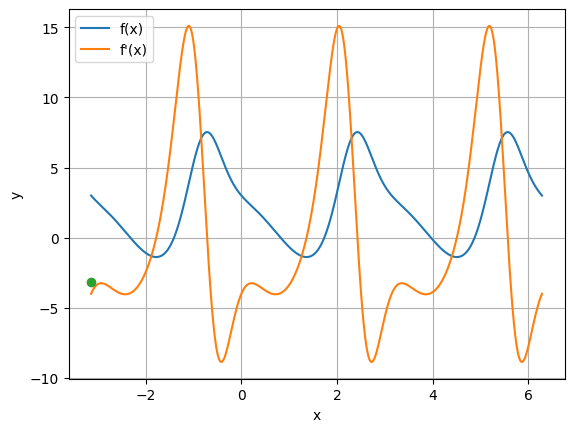

In [201]:
x = sp.symbols('x')

f = sp.exp(-2*sp.sin(2*x)) + 2*sp.cos(2*x)

f_prime = sp.diff(f, x)

g1 = sp.lambdify(x, f_prime)

fun_painter([g, g1],["f(x)","f'(x)"],thousand_test_points)

In [202]:
def hermit(xs, ys, g_):
    l = len(xs) * 2
    f_arr = []
    for ik in range(len(xs)):
        for j in range(2):
            f_arr.append([(ys[ik],xs[ik])])
    for i in range(1, l):
        c = 1
        for j in range(1, i+1):
            if f_arr[i][0][1] != f_arr[i-j][0][1]:
                f_arr[i].append(((f_arr[i][j-1][0] - f_arr[i-1][j-1][0]) / (f_arr[i][0][1] - f_arr[i-j][0][1]), f_arr[i][0][1]))
            else:
                f_arr[i].append((g_(f_arr[i][0][1])/math.factorial(c), f_arr[i][0][1]))
                c += 1
    def fun_x(xr):
        y = 0
        for io in range(len(xs)):
            for jo in range(2):
                z = f_arr[2 * io + jo][2 * io + jo][0]
                for lp in range(io):
                    z *= (xr - xs[lp]) ** 2
                z *= (xr - xs[io]) ** jo
                y += z
        return y
    return fun_x

In [203]:
def lagrange(xs, ys):
    L = [0] * len(xs)
    for i in range(len(xs)):
        m = 1
        for xk in xs:
            if xs[i] != xk:
                m *= (xs[i]-xk)
        L[i] = (ys[i]/m)
        
    def f(x):
        res = 0
        for j in range(len(xs)):
            fun = 1
            for xl in xs:
                if xs[j] != xl:
                    fun *= (x - xl)
            res += L[j] * fun
        return res
    return f

In [204]:
def newton(xs, ys):
    l = len(xs)
    f_arr = [[ys[i]] for i in range(l)]
    for i in range(1, l):
        for j in range(1, i+1):
            f_arr[i].append((f_arr[i][j-1] - f_arr[i-1][j-1]) / (xs[i] - xs[i-j]))
    def f(x):
        y = ys[0]
        for ii in range(1, l):
            temp = f_arr[ii][ii]
            for jj in range(ii):
                temp *= (x - xs[jj])
            y += temp
        return y
    return f

In [205]:
def max_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res = max(res, abs(f(i) - p(i)))
    return res

In [206]:
def sum_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res += (f(i) - p(i)) ** 2
    return res / len(points)

In [207]:
def generate_summary(n):
    # Generowanie węzłów i obliczenia dla regularnych punktów
    pr = generate_regular(a, b, g, n)
    f_l = lagrange(*pr)
    f_n = newton(*pr)
    f_h = hermit(*pr, g1)
    max_diff_hermite_r = max_diff(f_h)
    sum_diff_hermite_r = sum_diff(f_h)
    max_diff_lagrange_r = max_diff(f_l)
    sum_diff_lagrange_r = sum_diff(f_l)
    max_diff_newton_r = max_diff(f_n)
    sum_diff_newton_r = sum_diff(f_n)
    if max_diff_hermite_r / max_diff_newton_r > 5 : 
        fun_painter([f_n, f_l, g], ["Newton", "Lagrange", "f(x)"], pr, "Węzły rozmieszczone równomiernie")
        fun_painter([f_h, g], ["Hermit", "f(x)"], pr, "Węzły rozmieszczone równomiernie")
    else:
        fun_painter([f_h, f_n, f_l, g], ["Hermit", "Newton", "Lagrange", "f(x)"], pr, "Węzły rozmieszczone równomiernie")
    print("------------------------------RÓWNOLEGŁE------------------------------")

    print(f"Maksymalna różnica hermit: {max_diff_hermite_r}")
    print(f"Błąd średni kwadratowy hermit: {sum_diff_hermite_r}")
    print(f"Maksymalna różnica lagrange: {max_diff_lagrange_r}")
    print(f"Błąd średni kwadratowy lagrange: {sum_diff_lagrange_r}")
    print(f"Maksymalna różnica newton: {max_diff_newton_r}")
    print(f"Błąd średni kwadratowy newton: {sum_diff_newton_r}")
    print("----------------------------------------------------------------------")

    # Generowanie węzłów i obliczenia dla punktów Czebyszewa
    pc = generate_chebyshev(a, b, g, n)
    f_l = lagrange(*pc)
    f_n = newton(*pc)
    f_h = hermit(*pc, g1)
    max_diff_hermite_c = max_diff(f_h)
    sum_diff_hermite_c = sum_diff(f_h)
    max_diff_lagrange_c = max_diff(f_l)
    sum_diff_lagrange_c = sum_diff(f_l)
    max_diff_newton_c = max_diff(f_n)
    sum_diff_newton_c = sum_diff(f_n)
    if max_diff_hermite_c / max_diff_newton_c > 5 : 
        fun_painter([f_n, f_l, g], ["Newton", "Lagrange", "f(x)"], pc, "Węzły rozmieszczone zgodnie z zerami wielomianu Czebyszewa")
        fun_painter([f_h, g], ["Hermit", "f(x)"], pc, "Węzły rozmieszczone zgodnie z zerami wielomianu Czebyszewa")
    else:
        fun_painter([f_h, f_n, f_l, g], ["Hermit", "Newton", "Lagrange", "f(x)"], pc, "Węzły rozmieszczone zgodnie z zerami wielomianu Czebyszewa")
    print("------------------------------CZEBYSZEW------------------------------")

    print(f"Maksymalna różnica hermit: {max_diff_hermite_c}")
    print(f"Błąd średni kwadratowy hermit: {sum_diff_hermite_c}")
    print(f"Maksymalna różnica lagrange: {max_diff_lagrange_c}")
    print(f"Błąd średni kwadratowy lagrange: {sum_diff_lagrange_c}")
    print(f"Maksymalna różnica newton: {max_diff_newton_c}")
    print(f"Błąd średni kwadratowy newton: {sum_diff_newton_c}")
    print("----------------------------------------------------------------------")


    latex_code_regular = f"""
\\noindent\\begin{{minipage}}{{\\linewidth}}
\\centering
\\begin{{table}}[H]
\\centering
\\begin{{tabular}}{{l|l|l}}
                  & Maksymalna różnica & Średni błąd kwadratowy  \\\\ 
\\hline
Metoda Newtona    & {max_diff_newton_r} & {sum_diff_newton_r}                       \\\\ 
\\hline
Metoda Hermite'a  & {max_diff_hermite_r} & {sum_diff_hermite_r}                       \\\\ 
\\hline
Metoda Lagrange'a & {max_diff_lagrange_r} & {sum_diff_lagrange_r}                      
\\end{{tabular}}
\\captionsetup{{justification=centering}}
\\caption{{Porównanie błędów i maksymalnych różnic dla interpolacji Lagrange'a oraz Hermite’a przy {n} węzłach równomiernie rozmieszczonych}}
\\end{{table}}
\\end{{minipage}}
"""
    latex_code_chebyshev = f"""
\\noindent\\begin{{minipage}}{{\\linewidth}}
\\centering
\\begin{{table}}[H]
\\centering
\\begin{{tabular}}{{l|l|l}}
                  & Maksymalna różnica & Średni błąd kwadratowy  \\\\ 
\\hline
Metoda Newtona    & {max_diff_newton_c} & {sum_diff_newton_c}                       \\\\ 
\\hline
Metoda Hermite'a  & {max_diff_hermite_c} & {sum_diff_hermite_c}                       \\\\ 
\\hline
Metoda Lagrange'a & {max_diff_lagrange_c} & {sum_diff_lagrange_c}                      
\\end{{tabular}}
\\captionsetup{{justification=centering}}
\\caption{{Porównanie błędów i maksymalnych różnic dla interpolacji Lagrange'a oraz Hermite’a przy {n} węzłach rozmieszczonych zgodnie z zerami wielomianu Czebyszewa}}
\\end{{table}}
\\end{{minipage}}
"""
    # Wydrukowanie kodu LaTeX dla interpolacji z węzłami równomiernie rozmieszczonymi
    print(latex_code_regular)

    # Wydrukowanie kodu LaTeX dla interpolacji z węzłami Czebyszewa
    print(latex_code_chebyshev)

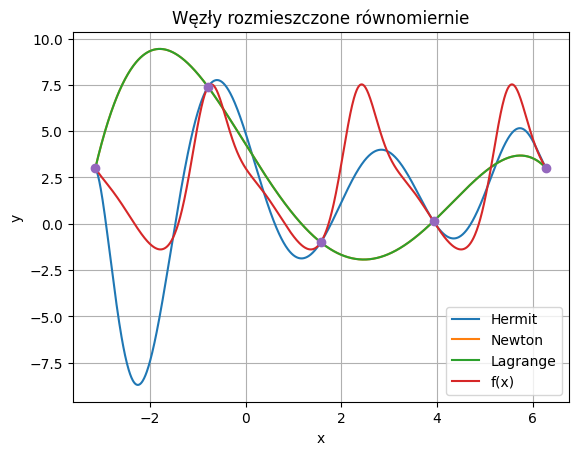

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit: 8.601023312831462
Błąd średni kwadratowy hermit: 7.464246116213026
Maksymalna różnica lagrange: 10.82196771586059
Błąd średni kwadratowy lagrange: 23.675605514145005
Maksymalna różnica newton: 10.821967715860593
Błąd średni kwadratowy newton: 23.675605514145005
----------------------------------------------------------------------


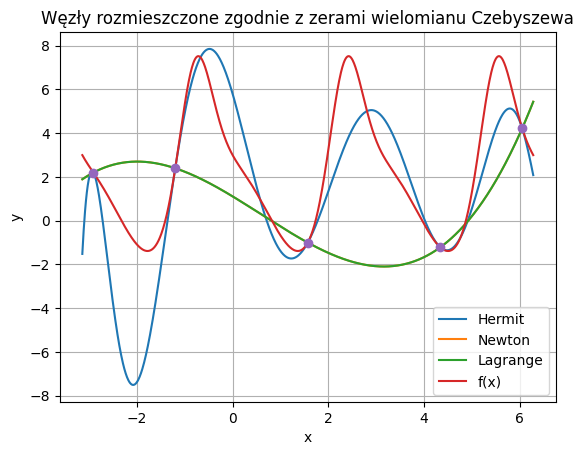

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit: 6.758748184177296
Błąd średni kwadratowy hermit: 5.436193875773504
Maksymalna różnica lagrange: 9.354852240912068
Błąd średni kwadratowy lagrange: 13.594786709150872
Maksymalna różnica newton: 9.354852240912068
Błąd średni kwadratowy newton: 13.594786709150874
----------------------------------------------------------------------

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{l|l|l}
                  & Maksymalna różnica & Średni błąd kwadratowy  \\ 
\hline
Metoda Newtona    & 10.821967715860593 & 23.675605514145005                       \\ 
\hline
Metoda Hermite'a  & 8.601023312831462 & 7.464246116213026                       \\ 
\hline
Metoda Lagrange'a & 10.82196771586059 & 23.675605514145005                      
\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla interpolacji Lagrange'a

In [208]:
generate_summary(5)

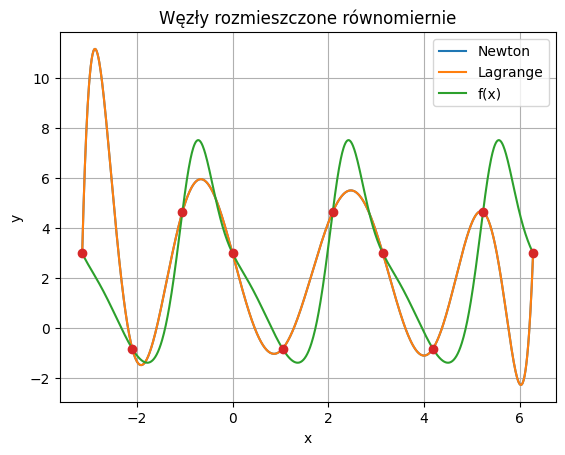

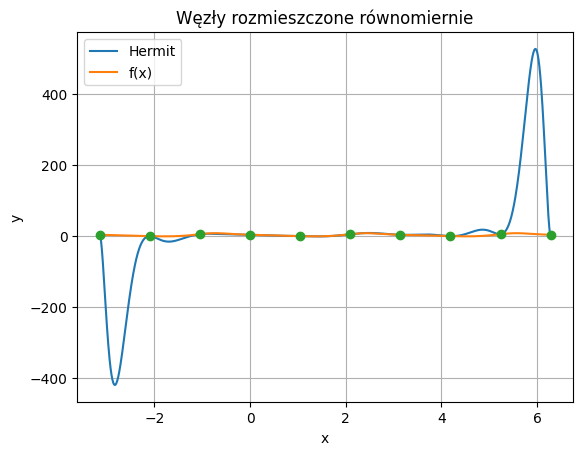

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit: 522.4823629510852
Błąd średni kwadratowy hermit: 16448.683903891968
Maksymalna różnica lagrange: 9.130733689673296
Błąd średni kwadratowy lagrange: 8.412687362178366
Maksymalna różnica newton: 9.130733689673301
Błąd średni kwadratowy newton: 8.412687362178309
----------------------------------------------------------------------


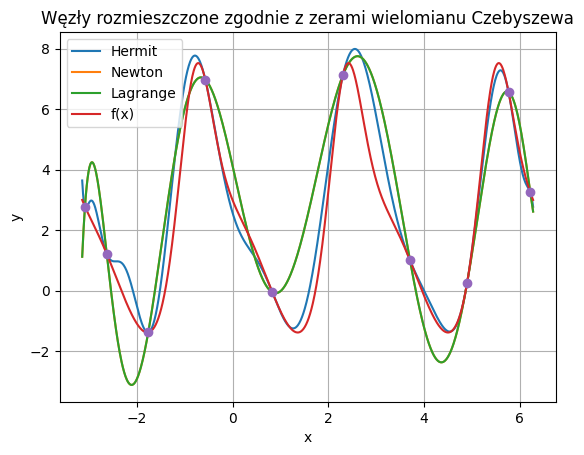

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit: 2.2837075983778226
Błąd średni kwadratowy hermit: 0.5989220429477424
Maksymalna różnica lagrange: 3.646291076525155
Błąd średni kwadratowy lagrange: 2.399210328243638
Maksymalna różnica newton: 3.6462910765251433
Błąd średni kwadratowy newton: 2.399210328243664
----------------------------------------------------------------------

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{l|l|l}
                  & Maksymalna różnica & Średni błąd kwadratowy  \\ 
\hline
Metoda Newtona    & 9.130733689673301 & 8.412687362178309                       \\ 
\hline
Metoda Hermite'a  & 522.4823629510852 & 16448.683903891968                       \\ 
\hline
Metoda Lagrange'a & 9.130733689673296 & 8.412687362178366                      
\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla interpolacji Lagrange'a 

In [209]:
generate_summary(10)

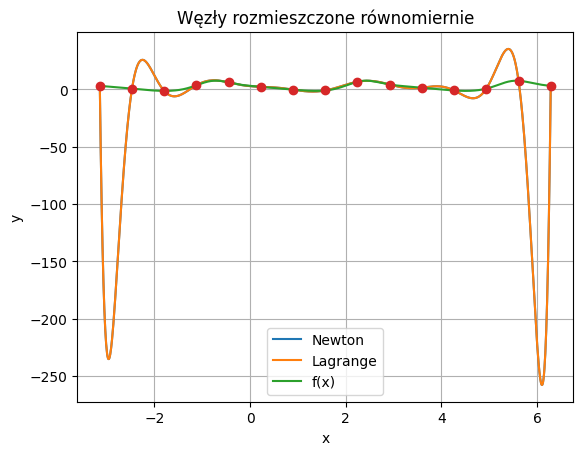

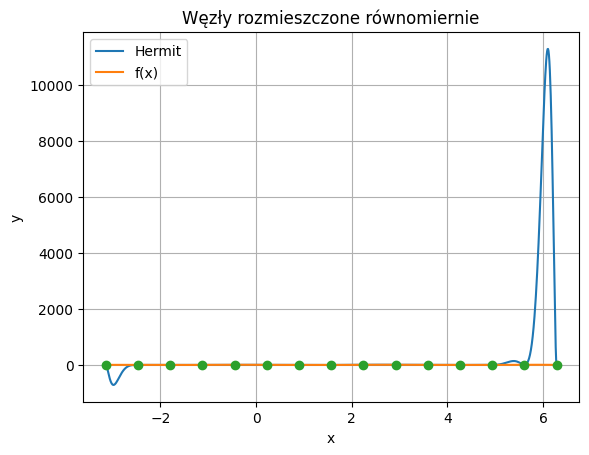

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit: 11272.167343384524
Błąd średni kwadratowy hermit: 2770870.2272818037
Maksymalna różnica lagrange: 261.55550944407656
Błąd średni kwadratowy lagrange: 3779.73809994504
Maksymalna różnica newton: 261.55550944432304
Błąd średni kwadratowy newton: 3779.7380999450115
----------------------------------------------------------------------


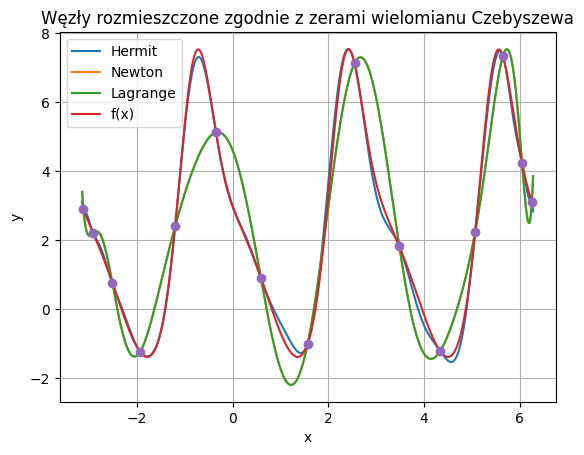

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit: 0.404647378670973
Błąd średni kwadratowy hermit: 0.02431854494377304
Maksymalna różnica lagrange: 3.20128791213871
Błąd średni kwadratowy lagrange: 1.2847562407315347
Maksymalna różnica newton: 3.201287912138712
Błąd średni kwadratowy newton: 1.284756240731285
----------------------------------------------------------------------

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{l|l|l}
                  & Maksymalna różnica & Średni błąd kwadratowy  \\ 
\hline
Metoda Newtona    & 261.55550944432304 & 3779.7380999450115                       \\ 
\hline
Metoda Hermite'a  & 11272.167343384524 & 2770870.2272818037                       \\ 
\hline
Metoda Lagrange'a & 261.55550944407656 & 3779.73809994504                      
\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla interpolacji Lagrange'

In [210]:
generate_summary(15)

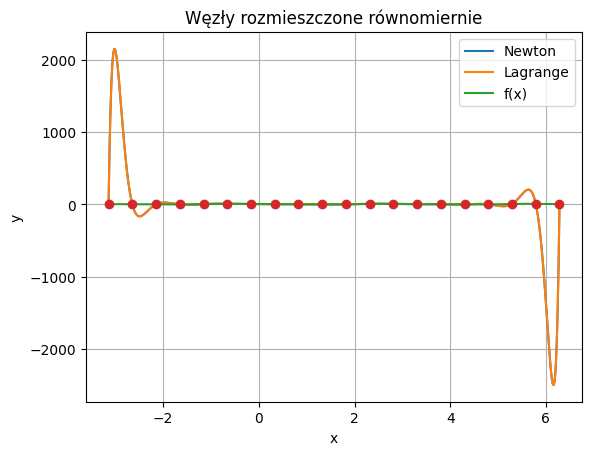

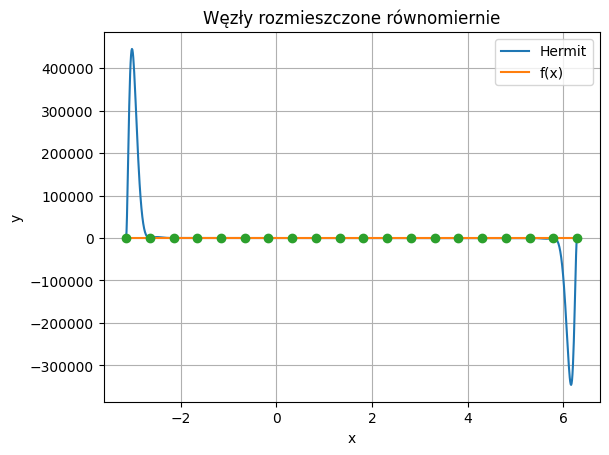

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit: 445435.6168432821
Błąd średni kwadratowy hermit: 4781364106.34861
Maksymalna różnica lagrange: 2500.879794356098
Błąd średni kwadratowy lagrange: 230142.5547129364
Maksymalna różnica newton: 2500.8797943424574
Błąd średni kwadratowy newton: 230142.55471269364
----------------------------------------------------------------------


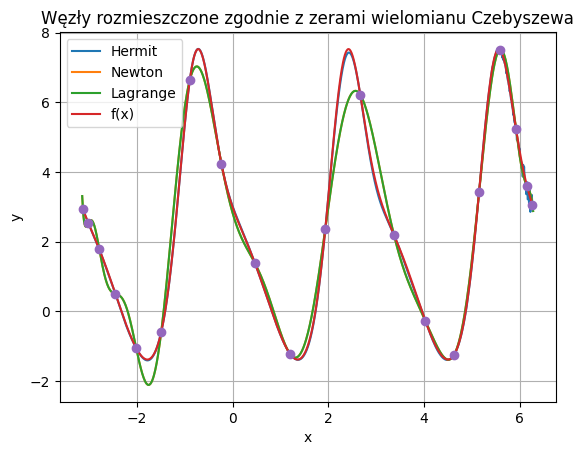

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit: 0.38626778551509444
Błąd średni kwadratowy hermit: 0.002085340951845285
Maksymalna różnica lagrange: 1.610729103232626
Błąd średni kwadratowy lagrange: 0.20866032298472917
Maksymalna różnica newton: 1.6107291032279436
Błąd średni kwadratowy newton: 0.20866032294099604
----------------------------------------------------------------------

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{l|l|l}
                  & Maksymalna różnica & Średni błąd kwadratowy  \\ 
\hline
Metoda Newtona    & 2500.8797943424574 & 230142.55471269364                       \\ 
\hline
Metoda Hermite'a  & 445435.6168432821 & 4781364106.34861                       \\ 
\hline
Metoda Lagrange'a & 2500.879794356098 & 230142.5547129364                      
\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla interpolacji Lagr

In [211]:
generate_summary(20)

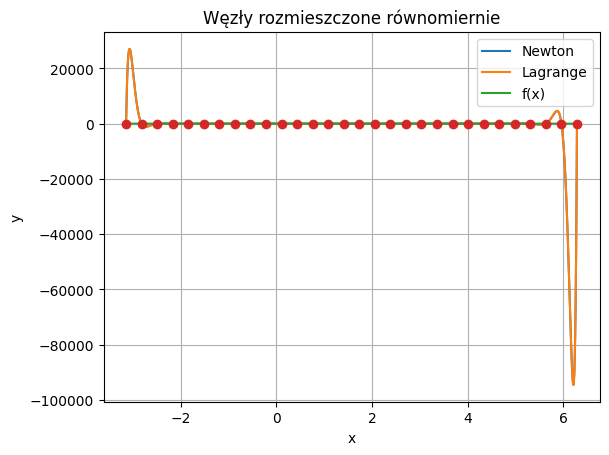

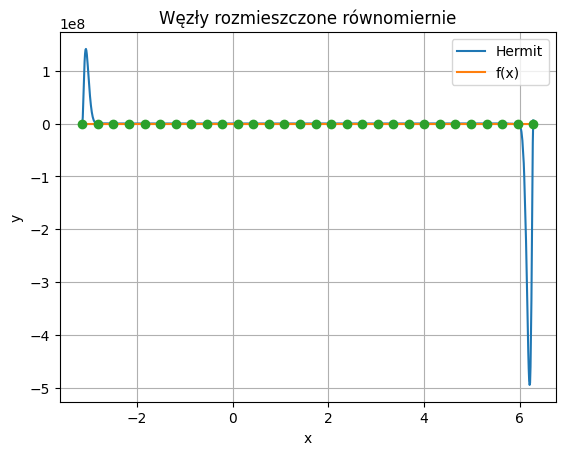

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit: 495105853.37386745
Błąd średni kwadratowy hermit: 2449063198170216.0
Maksymalna różnica lagrange: 94527.81113661516
Błąd średni kwadratowy lagrange: 124994270.07098387
Maksymalna różnica newton: 94527.81109213637
Błąd średni kwadratowy newton: 124994270.12697047
----------------------------------------------------------------------


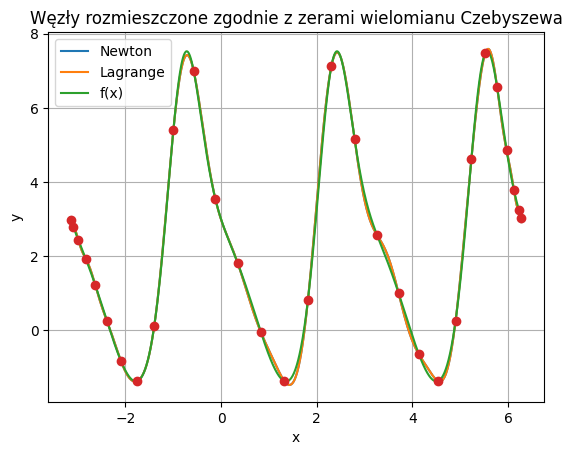

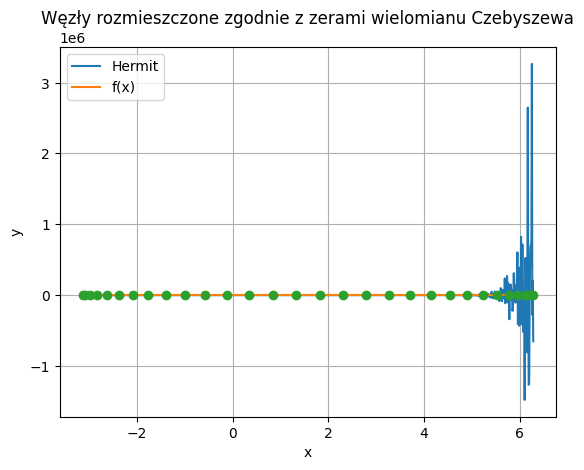

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit: 3264127.1527725034
Błąd średni kwadratowy hermit: 30051906096.055134
Maksymalna różnica lagrange: 0.22718120692845334
Błąd średni kwadratowy lagrange: 0.007787000685605445
Maksymalna różnica newton: 0.22718120700894873
Błąd średni kwadratowy newton: 0.007787043467799464
----------------------------------------------------------------------

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{l|l|l}
                  & Maksymalna różnica & Średni błąd kwadratowy  \\ 
\hline
Metoda Newtona    & 94527.81109213637 & 124994270.12697047                       \\ 
\hline
Metoda Hermite'a  & 495105853.37386745 & 2449063198170216.0                       \\ 
\hline
Metoda Lagrange'a & 94527.81113661516 & 124994270.07098387                      
\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla interpolacji

In [212]:
generate_summary(30)

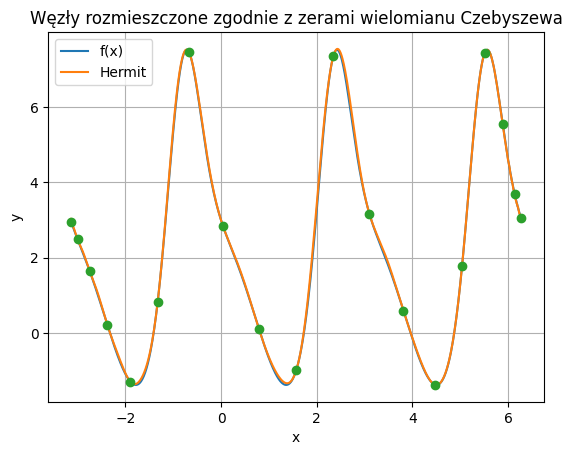

In [213]:
pr = generate_chebyshev(a, b, g, 19)
f_h = hermit(*pr, g1)
fun_painter([g, f_h],["f(x)","Hermit"],pr,"Węzły rozmieszczone zgodnie z zerami wielomianu Czebyszewa")

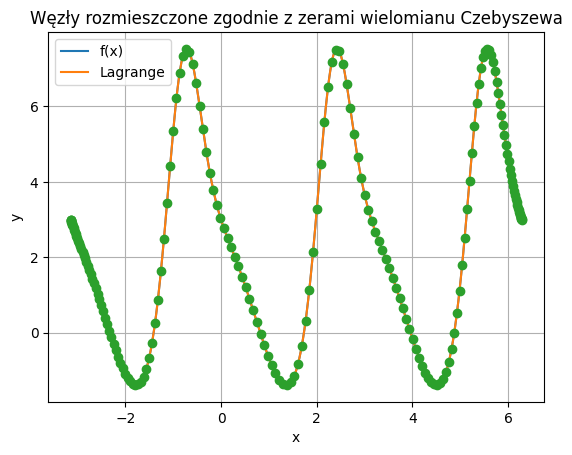

In [214]:
pc = generate_chebyshev(a, b, g, 188)
f_l = lagrange(*pc)
fun_painter([g, f_l],["f(x)","Lagrange"],pc,"Węzły rozmieszczone zgodnie z zerami wielomianu Czebyszewa")

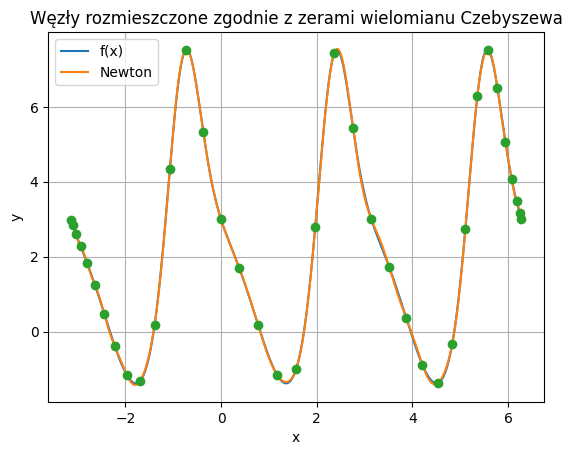

In [215]:
pc = generate_chebyshev(a, b, g, 37)
f_n = newton(*pc)
fun_painter([g, f_n],["f(x)","Newton"],pc,"Węzły rozmieszczone zgodnie z zerami wielomianu Czebyszewa")

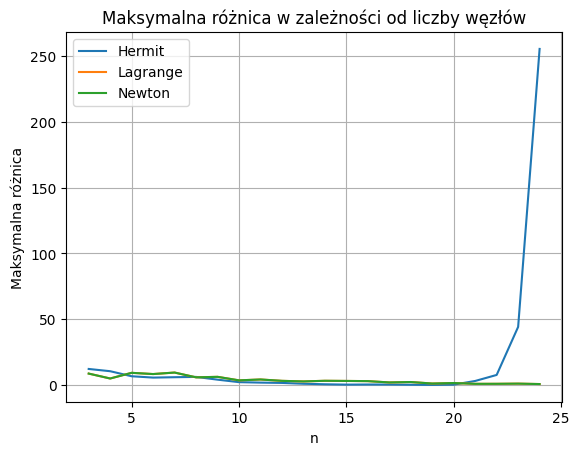

In [222]:
y1 = []
y2 = []
y3 = []
for i in range(3, 25):
    pc = generate_chebyshev(a, b, g, i)
    f_l = lagrange(*pc)
    f_n = newton(*pc)
    f_h = hermit(*pc, g1)
    max_diff_hermite_c = max_diff(f_h)
    max_diff_lagrange_c = max_diff(f_l)
    max_diff_newton_c = max_diff(f_n)
    y1.append(max_diff_hermite_c)
    y2.append(max_diff_lagrange_c)
    y3.append(max_diff_newton_c)

x = np.arange(3, 25)
plt.figure()
plt.grid()
plt.xlabel('n')
plt.ylabel('Maksymalna różnica')
plt.plot(x, y1, label="Hermit")
plt.plot(x, y2, label="Lagrange")
plt.plot(x, y3, label="Newton")
plt.legend()
plt.title("Maksymalna różnica w zależności od liczby węzłów")
plt.show()
